In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
train_file_path = "DailyDelhiClimateTrain.csv"
test_file_path = "DailyDelhiClimateTest.csv"

# Load the latest train data version
train_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sumanthvrao/daily-climate-time-series-data",
  train_file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# Load the latest test data version
test_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sumanthvrao/daily-climate-time-series-data",
  test_file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


print("First 5 records of Train Data:", train_df.head())
print("\n")
print("First 5 records of Test Data:", test_df.head())

/tmp/ipython-input-160922960.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  train_df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'daily-climate-time-series-data' dataset.


/tmp/ipython-input-160922960.py:22: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  test_df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'daily-climate-time-series-data' dataset.
First 5 records of Train Data:          date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


First 5 records of Test Data:          date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [3]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 11.5 MB/s eta 0:00:00


# 📈 BaggedETS Time Series Model

**`BaggedETS`** (Bagged Exponential Smoothing) is an ensemble forecasting method that significantly improves the robustness and accuracy of the traditional **ETS (Exponential Smoothing)** model. It achieves this by combining forecasts from multiple ETS models, each trained on a bootstrapped version of the original time series data. This approach is particularly effective in reducing the variance inherent in single-model ETS forecasts.

---

## ⚙️ How BaggedETS Works

BaggedETS is an implementation of **Bootstrap Aggregation (Bagging)** specifically tailored for time series data using ETS as the base estimator.

1.  **Bootstrap Sampling:** The original time series is resampled with replacement to create $N$ new, slightly perturbed time series, where $N$ is the number of estimators (or "bags"). This is typically done using **Moving Block Bootstrap (MBB)** to preserve the time-series correlation structure.
2.  **Base Model Training:** An individual **ETS** model is fitted to *each* of the $N$ bootstrapped series.
    * **ETS (Exponential Smoothing):** The base model forecasts a time series by weighting past observations, with the weights decaying exponentially as the observations get older. It typically has components for **Error (E)**, **Trend (T)**, and **Seasonality (S)** (e.g., ETS(A,N,N) for Additive Error, No Trend, No Seasonality).
3.  **Aggregation (Averaging):** For a given forecast horizon, the $N$ individual forecasts generated by the ETS models are averaged to produce the final, more stable **`BaggedETS`** forecast.



---

## 🌟 Advantages of BaggedETS

* **Improved Accuracy and Stability:** By averaging multiple forecasts, **`BaggedETS`** reduces the variance and risk of overfitting compared to a single ETS model, often leading to lower Mean Squared Error (MSE).
* **Robustness to Noise/Outliers:** The bagging process smooths out the effects of random noise or mild outliers present in the original series, as they are distributed across different bootstrap samples.
* **Simplicity and Interpretability:** While an ensemble, the base model (ETS) remains fundamentally simple and easy to understand, leveraging the well-established principles of exponential smoothing.
* **Automatic Model Selection:** The base ETS estimator often uses automated procedures to select the best combination of Error, Trend, and Seasonality components for each bootstrapped series.

---

## 📉 Downsides of BaggedETS

* **Increased Computational Cost:** Training $N$ separate ETS models is significantly slower and more computationally intensive than training a single ETS model.
* **Loss of Single Model Insight:** While the base models are simple, the ensemble's structure makes it slightly harder to interpret the individual contribution of the trend or seasonal components compared to analyzing a single, well-specified ETS model.
* **Parameter Tuning:** The number of estimators ($N$) and the specific bootstrap method (e.g., block size for MBB) introduce new hyperparameters that must be tuned for optimal performance.

---

## 🚀 Usage with `sktime` (Training & Testing)

In **`sktime`**, `BaggedETS` is available in the `forecasting.ets` module.

### 1. Installation and Import

- Import BaggingForecaster, AutoETS as the models from Sktime


### 2. Data Preparation
Time series data in `sktime` should be a `pd.Series` or `pd.DataFrame` with a `pd.PeriodIndex` or `pd.DatetimeIndex`.

### 3. Model Training
#### ⚙️ How to Implement BaggedETS in `sktime`

Instead of a specific `BaggedETS` class, you use the composite model structure:

$$
\text{BaggedETS} \equiv \text{BaggingForecaster}(\text{base\_forecaster}=\text{AutoETS})
$$

#### i. The Core Component: `BaggingForecaster`

* **Location:** `sktime.forecasting.compose.BaggingForecaster`
* **Function:** It is a **meta-estimator** that implements the general Bootstrap Aggregation (Bagging) logic for any `sktime` forecaster.
    * It creates multiple bootstrap samples of the input time series.
    * It trains the specified `base_forecaster` on each sample.
    * It aggregates the individual forecasts (usually by mean) for the final prediction.

#### ii. The Base Estimator: ETS

* **Location:** `sktime.forecasting.ets.AutoETS` (or `sktime.forecasting.ets.ETS`)
* **Function:** This is the core Exponential Smoothing model that will be bagged. Using `AutoETS` is common as it automatically selects the best Error, Trend, and Seasonality components for each bootstrapped series.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.compose import BaggingForecaster
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_squared_error, mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

In [5]:
# --- 2. Data Preprocessing and Series Creation ---

# Set 'date' column as index and convert to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

train_df = train_df.set_index('date').sort_index()
test_df = test_df.set_index('date').sort_index()

# Select the target variable (e.g., 'meantemp') and convert to pandas Series for sktime
y_train = train_df['meantemp'].astype(float)
y_test = test_df['meantemp'].astype(float)

# Handle potential missing values (though usually clean, good practice)
y_train = y_train.interpolate(method='linear')
y_test = y_test.interpolate(method='linear')

print(f"Training observations: {len(y_train)}, Test observations: {len(y_test)}")

Training observations: 1462, Test observations: 114


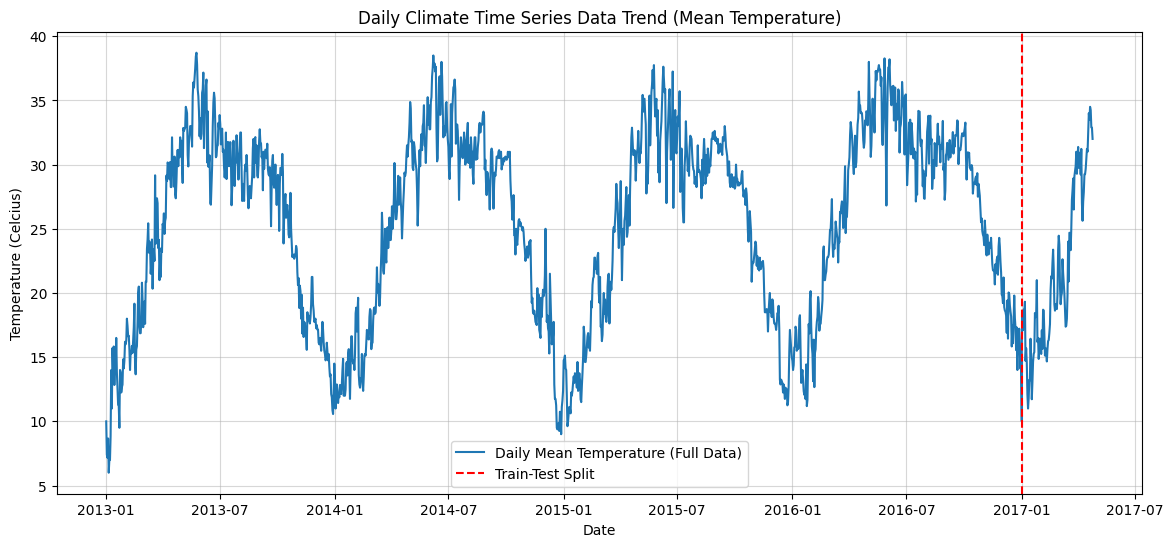

In [6]:
# --- 3. Data Trend Plot ---

# Combine series for a single trend plot
y_full = pd.concat([y_train, y_test])

plt.figure(figsize=(14, 6))
plt.plot(y_full, label='Daily Mean Temperature (Full Data)')
plt.axvline(x=y_train.index.max(), color='r', linestyle='--', label='Train-Test Split')
plt.title('Daily Climate Time Series Data Trend (Mean Temperature)')
plt.xlabel('Date')
plt.ylabel('Temperature (Celcius)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

In [19]:
# --- 4. Model Training and Forecasting ---

from sktime.transformations.bootstrap import STLBootstrapTransformer

# Define the forecasting horizon (fh) based on the test set length
fh = np.arange(1, len(y_test) + 1)

# Define the base ETS model
base_forecaster = AutoETS(
    auto=True,
    n_jobs=-1,
    sp = 7
)

# Define the Bagging Forecaster (Bagged ETS)
forecaster = BaggingForecaster(
    forecaster=base_forecaster,     # Pass the corrected AutoETS object
    bootstrap_transformer=STLBootstrapTransformer(sp=12),
    random_state=42
)

print(f"\nTraining Bagged ETS on Training Data...")
# Fit only on the provided training data (y_train)
forecaster.fit(y_train)
print("Training Complete. Generating Forecast...")

# Make predictions for the period defined by fh
y_pred = forecaster.predict(fh)
print("Forecast Generated.")


Training Bagged ETS on Training Data...
Training Complete. Generating Forecast...
Forecast Generated.


In [21]:
# --- 5. Model Evaluation ---

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("\n## 📊 Model Evaluation on Test Data")

print(f"**Root Mean Squared Error (RMSE):** {rmse:.4f}")
print(f"**Mean Absolute Percentage Error (MAPE):** {mape:.2f}%")


## 📊 Model Evaluation on Test Data
**Root Mean Squared Error (RMSE):** 116.8707
**Mean Absolute Percentage Error (MAPE):** 35.92%


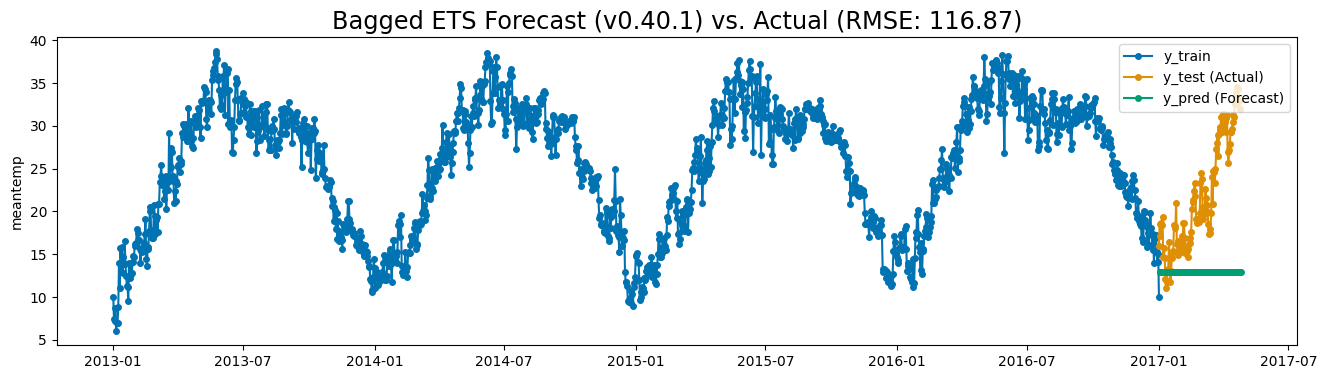

Plot 2: Train/Test/Forecast Comparison Displayed.


In [22]:
# --- 6. Plotting Results ---

# Plot the training data, actual test data, and the forecast
title = f'Bagged ETS Forecast (v0.40.1) vs. Actual (RMSE: {rmse:.2f})'
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test (Actual)', 'y_pred (Forecast)'], title=title)

plt.show()
print("Plot 2: Train/Test/Forecast Comparison Displayed.")